In [1]:
import numpy as np
import matplotlib.pyplot as plt
import defs
import appynho
import perfis

In [2]:
litho_types = defs.read_litho_types('../data/lito_code.csv')

In [3]:
# reading the files .LAS of all wells
# using the function "read_well" in the file "defs"
well_25 = defs.read_well('../data/7-MP-25-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_34 = defs.read_well('../data/7-MP-34D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_36 = defs.read_well('../data/7-MP-36D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_47 = defs.read_well('../data/7-MP-47DP-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'DT', 'Lith_new'])
well_55 = defs.read_well('../data/7-MP-55D-BA.las', ['DEPTH', 'GR', 'NPHI', 'RHOB', 'Lith_new'])

In [4]:
well_25['LITHOLOGY'] = well_25['Lith_new']
well_34['LITHOLOGY'] = well_34['Lith_new']
well_36['LITHOLOGY'] = well_36['Lith_new']
well_47['LITHOLOGY'] = well_47['Lith_new']
well_55['LITHOLOGY'] = well_55['Lith_new']

In [5]:
#setting top and base of the Maracangalha formation
top = 2500.00
base = 3100.00
step = 5
overlap = 0.00

In [6]:
# cutting all curves of all wells, selecting the top-base range
# using the function "formation_zone" in the file "defs"
formation_25 = defs.formation_zone(well_25, top, base)
formation_34 = defs.formation_zone(well_34, top, base)
formation_36 = defs.formation_zone(well_36, top, base)
formation_47 = defs.formation_zone(well_47, top, base)
formation_55 = defs.formation_zone(well_55, top, base)

In [7]:
#creating curves that only contains one lithology type, for each lithology
#using the function "separate_lithology" in the file "defs"
separate_25 = defs.separate_lithology(formation_25, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_34 = defs.separate_lithology(formation_34, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_36 = defs.separate_lithology(formation_36, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_47 = defs.separate_lithology(formation_47, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB', 'DT'])
separate_55 = defs.separate_lithology(formation_55, litho_types, ['LITHOLOGY', 'GR', 'NPHI', 'RHOB'])

In [8]:
statistic_25 = defs.statistic_lithology(separate_25, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_34 = defs.statistic_lithology(separate_34, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_36 = defs.statistic_lithology(separate_36, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)
statistic_47 = defs.statistic_lithology(separate_47, ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE'], ['GR', 'NPHI', 'RHOB', 'DT'], step, top, base, overlap)

C:\Users\rmota\Documents\PFG_2020\codes\defs.py:393: RuntimeWarning: Mean of empty slice
  m = np.nanmean(curve_save[w])
c:\users\rmota\.conda\envs\tcc3\lib\site-packages\numpy\lib\nanfunctions.py:1665: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


In [9]:
def create_database(statistics, lithology, curve):
    means = []
    stds = []
    for well in statistics:
        means.append(np.array(well[lithology][curve]['Mean']['Value']))
        stds.append(np.array(well[lithology][curve]['Std']['Value']))
        
    m = means[0]
    s = stds[0]
    for mean, std in zip(means[1:], stds[1:]):
        nans = np.array(list(map(np.isnan, m)))
        m[nans] = mean[nans]
        s[nans] = std[nans]
    
    return [list(m), list(s)]

In [10]:
tops = statistic_25['SANDSTONE']['GR']['Mean']['Top']
bases = statistic_25['SANDSTONE']['GR']['Mean']['Base']

In [11]:
lithology = ['SANDSTONE', 'SLURY', 'SHALE', 'SILTITE']
curves = ['GR', 'NPHI', 'RHOB', 'DT']
database = {}
for lith in lithology:
    database[lith] = {}
    for curve in curves:
        database[lith][curve] = {}
        database[lith][curve]['Mean'] = {}
        database[lith][curve]['Std'] = {}
        database[lith][curve]['Mean']['Top'] = tops
        database[lith][curve]['Mean']['Base'] = bases
        database[lith][curve]['Mean']['Value'] = create_database([statistic_25, statistic_34, statistic_36, statistic_47], lith, curve)[0]
        database[lith][curve]['Std']['Top'] = top
        database[lith][curve]['Std']['Base'] = base
        database[lith][curve]['Std']['Value'] = create_database([statistic_25, statistic_34, statistic_36, statistic_47], lith, curve)[1]

In [12]:
gr_sort = defs.sort_curve(separate_55, database, litho_types, 'GR', step, top, base)
nphi_sort = defs.sort_curve(separate_55, database, litho_types, 'NPHI', step, top, base)
rhob_sort = defs.sort_curve(separate_55, database, litho_types, 'RHOB', step, top, base)
dt_sort = defs.sort_curve(separate_55, database, litho_types, 'DT', step, top, base)

In [14]:
cores = {}
for lith in litho_types:
    cores[int(litho_types[lith]['CODE'])] = [litho_types[lith]['COLOR'],lith]

In [15]:
cores[25][0] = '#a9a9a9'

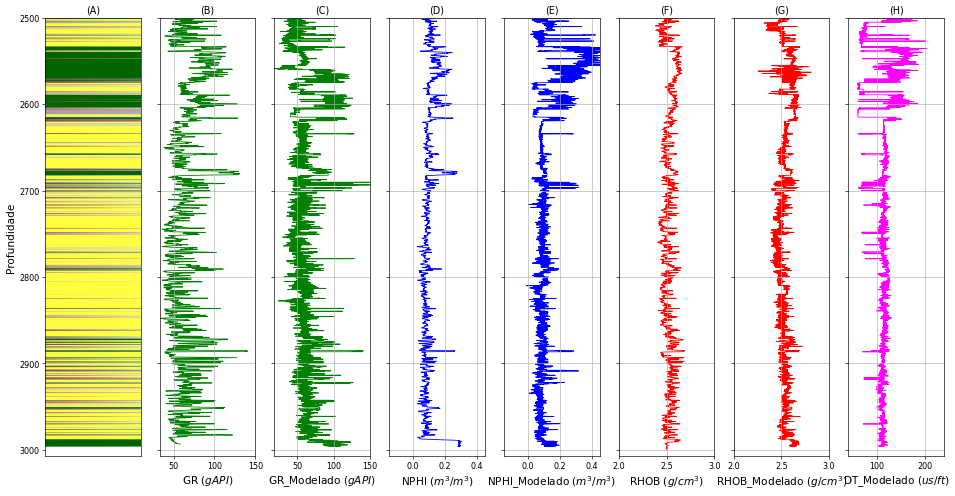

In [16]:
layout_100_singular = {
    'comprimento':20,
    'altura':10,
    'linha_estilo' : '-',
    'titulo_fonte':12,
    'resolucao':58,
    'titulo_geral':'',
    'descricao_x':'',
    'descricao_y':'Profundidade $(m)$'
}

grafico = perfis.plotagem(8, layout_100_singular)

grafico.plot_l(0, separate_55['LITHOLOGY'], separate_55['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'titulo':'(A)'})

grafico.plot_s(1, separate_55['GR'], separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR $(gAPI)$', 'titulo':'(B)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})
grafico.plot_s(2, gr_sort, separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR_Modelado $(gAPI)$', 'titulo':'(C)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})


grafico.plot_s(3, separate_55['NPHI'], separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI $(m^3/m^3)$', 'titulo':'(D)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})
grafico.plot_s(4, nphi_sort, separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI_Modelado $(m^3/m^3)$', 'titulo':'(E)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})

grafico.plot_s(5, separate_55['RHOB'], separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB $(g/cm^3)$', 'titulo':'(F)', 'minimo_x': 2.0, 'maximo_x': 3.0})
grafico.plot_s(6, rhob_sort, separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB_Modelado $(g/cm^3)$', 'titulo':'(G)', 'minimo_x': 2.0, 'maximo_x': 3.0})

grafico.plot_s(7, dt_sort, separate_55['DEPTH'],{'cor':'magenta', 'descricao_x':'DT_Modelado $(us/ft)$', 'titulo':'(H)', 'minimo_x': 40.0, 'maximo_x': 240.0})

#grafico.plot_l(3, separate_55['LITHOLOGY'], separate_55['DEPTH'], cores, {'titulo':'7-MP-55D-BA','curva_limite':separate_55['LITHOLOGY'],'linha_espessura':0.1})

grafico.salvar("../image/resultado_multiplo_" + str(step) +".png")

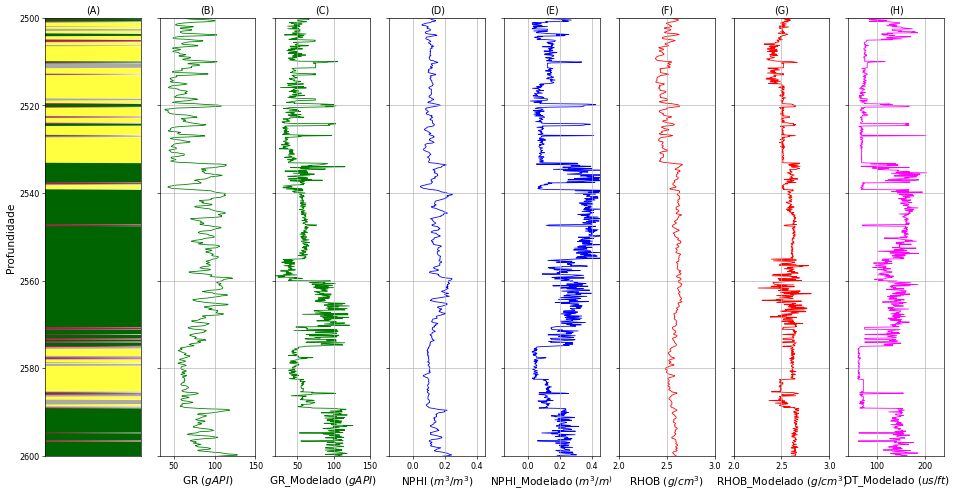

In [18]:
layout_100_singular = {
    'comprimento':20,
    'altura':10,
    'linha_estilo' : '-',
    'titulo_fonte':12,
    'resolucao':58,
    'titulo_geral':'',
    'descricao_x':'',
    'descricao_y':'Profundidade $(m)$',
    'minimo_y': 2500,
    'maximo_y': 2600
}

grafico = perfis.plotagem(8, layout_100_singular)

grafico.plot_l(0, separate_55['LITHOLOGY'], separate_55['DEPTH'], relacao_cor = cores, padrao_local = {'descricao_y':'Profundidade', 'descricao_x':'', 'titulo':'(A)'})

grafico.plot_s(1, separate_55['GR'], separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR $(gAPI)$', 'titulo':'(B)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})
grafico.plot_s(2, gr_sort, separate_55['DEPTH'],{'cor':'g', 'descricao_x':'GR_Modelado $(gAPI)$', 'titulo':'(C)', 'minimo_x': 0, 'maximo_x': 150, 'ordem_z':-1})


grafico.plot_s(3, separate_55['NPHI'], separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI $(m^3/m^3)$', 'titulo':'(D)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})
grafico.plot_s(4, nphi_sort, separate_55['DEPTH'],{'cor':'b', 'descricao_x':'NPHI_Modelado $(m^3/m^)$', 'titulo':'(E)', 'minimo_x': -0.15, 'maximo_x': 0.45, 'ordem_z':-1})

grafico.plot_s(5, separate_55['RHOB'], separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB $(g/cm^3)$', 'titulo':'(F)', 'minimo_x': 2.0, 'maximo_x': 3.0})
grafico.plot_s(6, rhob_sort, separate_55['DEPTH'],{'cor':'r', 'descricao_x':'RHOB_Modelado $(g/cm^3)$', 'titulo':'(G)', 'minimo_x': 2.0, 'maximo_x': 3.0})

grafico.plot_s(7, dt_sort, separate_55['DEPTH'],{'cor':'magenta', 'descricao_x':'DT_Modelado $(us/ft)$', 'titulo':'(H)', 'minimo_x': 40.0, 'maximo_x': 240.0})

#grafico.plot_l(3, separate_55['LITHOLOGY'], separate_55['DEPTH'], cores, {'titulo':'7-MP-55D-BA','curva_limite':separate_55['LITHOLOGY'],'linha_espessura':0.1})

grafico.salvar("../image/resultado_multiplo_" + str(step) +"_2500_2600.png")

In [55]:
x1 = np.linspace(min(separate_55['GR']), max(separate_55['GR']), len(separate_55['GR']))

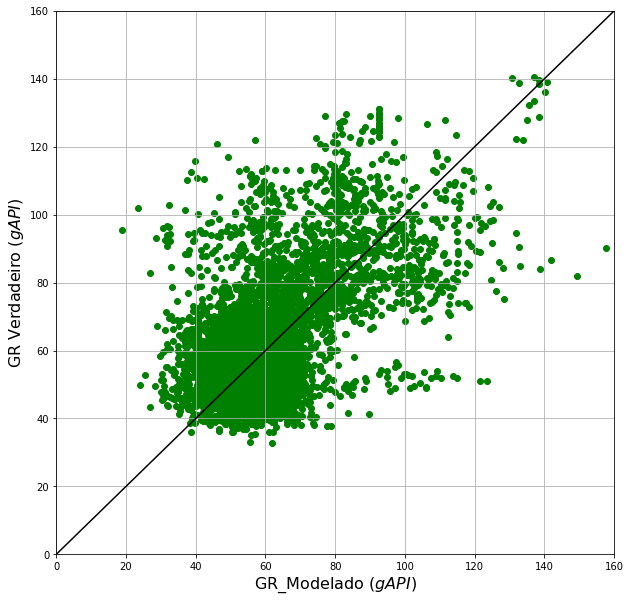

In [27]:
plt.figure(figsize=(10,10))
plt.plot(x, x, color='black')
plt.scatter(gr_sort, separate_55['GR'], color= 'green')
plt.xlabel('GR_Modelado ($gAPI$)', fontsize=16)
plt.ylabel('GR Verdadeiro ($gAPI$)', fontsize=16)
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.grid()
plt.show()

In [46]:
x2 = np.linspace(min(separate_55['NPHI']), max(separate_55['NPHI']), len(separate_55['NPHI']))

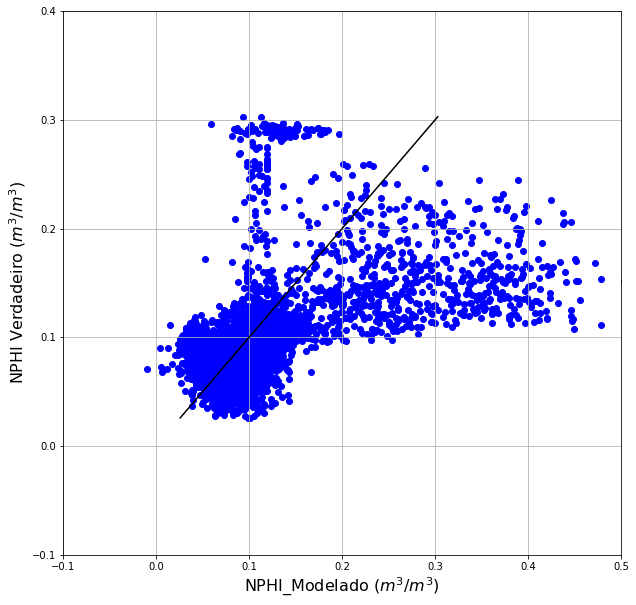

In [38]:
plt.figure(figsize=(10,10))
plt.plot(x, x, color='black')
plt.scatter(nphi_sort, separate_55['NPHI'], color= 'blue')
plt.xlabel('NPHI_Modelado ($m^3/m^3$)', fontsize=16)
plt.ylabel('NPHI Verdadeiro ($m^3/m^3$)', fontsize=16)
plt.xlim(-0.1, 0.5)
plt.ylim(-0.1, 0.4)
plt.grid()
plt.show()

In [47]:
x3 = np.linspace(min(separate_55['RHOB']), max(separate_55['RHOB']), len(separate_55['RHOB']))

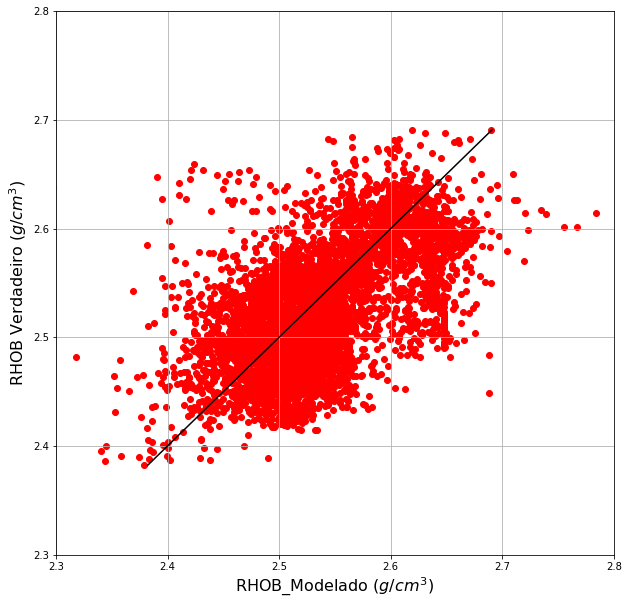

In [43]:
plt.figure(figsize=(10,10))
plt.plot(x, x, color='black')
plt.scatter(rhob_sort, separate_55['RHOB'], color= 'red')
plt.xlabel('RHOB_Modelado ($g/cm^3$)', fontsize=16)
plt.ylabel('RHOB Verdadeiro ($g/cm^3$)', fontsize=16)
plt.xlim(2.3, 2.8)
plt.ylim(2.3, 2.8)
plt.grid()
plt.show()

In [76]:
plt.rcParams.update({'font.size': 14})

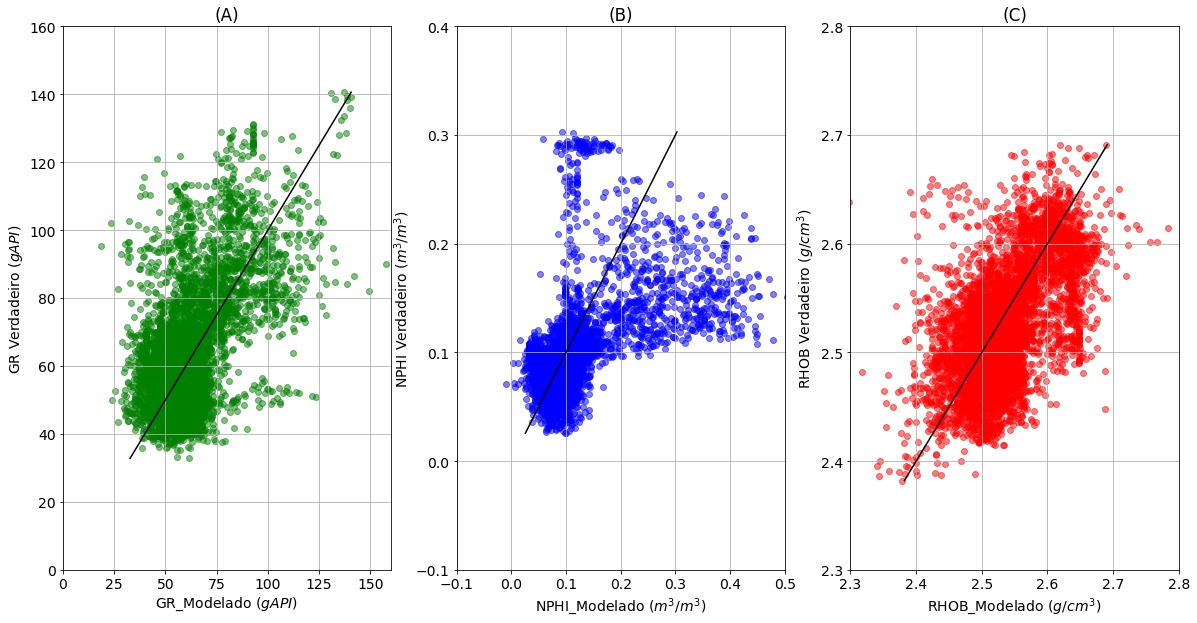

In [80]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.plot(x1, x1, color='black')
plt.scatter(gr_sort, separate_55['GR'], color= 'green', alpha=0.5)
plt.xlabel('GR_Modelado ($gAPI$)')
plt.ylabel('GR Verdadeiro ($gAPI$)')
plt.xlim(0, 160)
plt.ylim(0, 160)
plt.title('(A)')
plt.grid()
plt.subplot(132)
plt.plot(x2, x2, color='black')
plt.scatter(nphi_sort, separate_55['NPHI'], color= 'blue', alpha=0.5)
plt.xlabel('NPHI_Modelado ($m^3/m^3$)')
plt.ylabel('NPHI Verdadeiro ($m^3/m^3$)')
plt.xlim(-0.1, 0.5)
plt.ylim(-0.1, 0.4)
plt.title('(B)')
plt.grid()
plt.subplot(133)
plt.plot(x3, x3, color='black')
plt.scatter(rhob_sort, separate_55['RHOB'], color= 'red', alpha=0.5)
plt.xlabel('RHOB_Modelado ($g/cm^3$)')
plt.ylabel('RHOB Verdadeiro ($g/cm^3$)')
plt.xlim(2.3, 2.8)
plt.ylim(2.3, 2.8)
plt.title('(C)')
plt.grid()
plt.savefig('../image/scatterplots_multiplo_5.pdf', dpi=300, transparent=True, bbox_inches = 'tight')
plt.show()

<Figure size 432x288 with 0 Axes>